In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from scipy import stats
from sklearn.ensemble import RandomForestClassifier

from pandas.plotting import scatter_matrix
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, QuantileTransformer, KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import os, glob, math, gc, logging, warnings, random



#Importing the dataframes,objects,algorithms..

In [180]:
#importing the csv files
train = pd.read_csv('final_train.csv')
test = pd.read_csv('final_test.csv')
test_ids =  test["id"]
sample_submission = pd.read_csv("sample_submission.csv")
train.head(20)

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,target
0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,3,1,0
1,2,6,0,2,2,1,0,0,1,0,0,1,0,0,2,0,1
2,3,3,0,4,0,0,0,0,2,0,3,0,0,1,5,1,1
3,4,2,0,7,3,5,0,1,1,3,4,8,1,0,8,0,0
4,5,1,0,2,2,3,0,0,1,0,3,0,0,1,0,1,0
5,6,5,0,6,1,0,11,0,0,0,4,0,0,0,0,0,0
6,7,0,0,1,2,0,0,0,3,1,0,0,0,0,0,0,1
7,8,4,3,14,0,1,1,2,2,0,1,2,0,0,4,1,0
8,9,3,15,2,0,0,2,1,2,0,17,2,4,16,53,3,0
9,10,7,0,2,0,4,1,0,0,2,1,0,0,0,0,0,0


In [181]:
#creating a list to store required atrributes
feature_cols = test.columns.tolist()
cat_cols = ["id"]
cnt_cols = [col for col in feature_cols if col not in cat_cols]

# Analysing dataset through graph

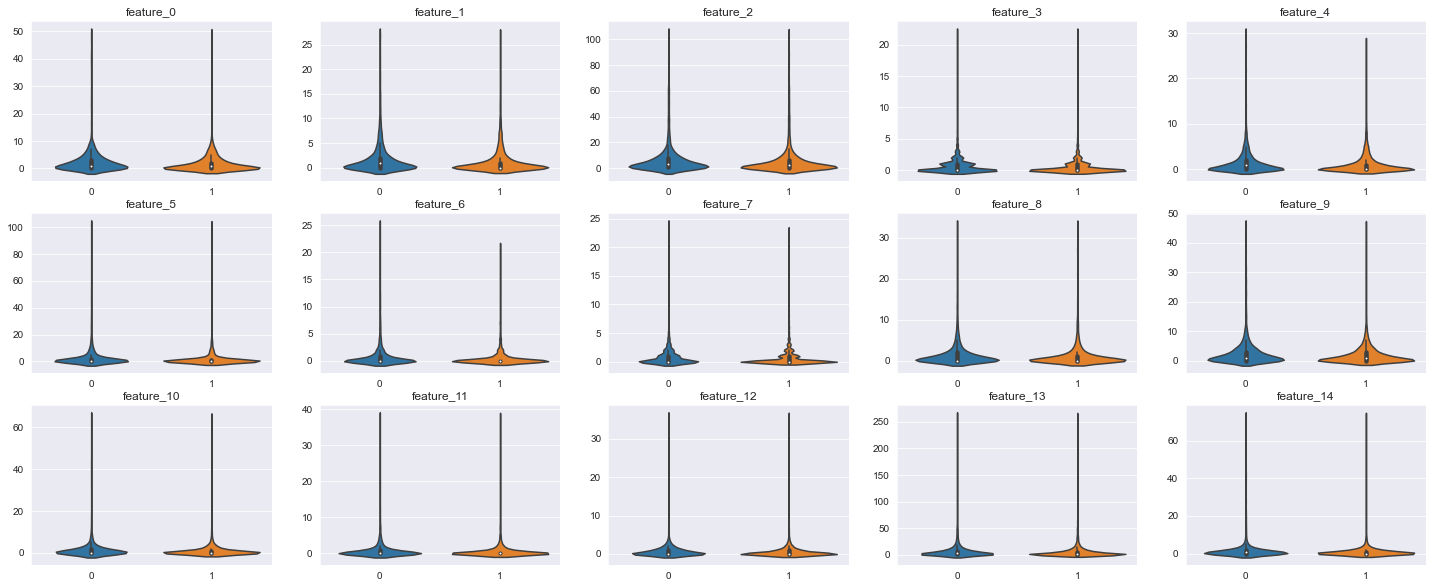

In [182]:
plt.figure(figsize=(25, 10))
for i, col in enumerate(cnt_cols):
    plt.subplot(3, 5, i+1)
    sns.violinplot(data=train, x='target', y=col)
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("")
plt.show()

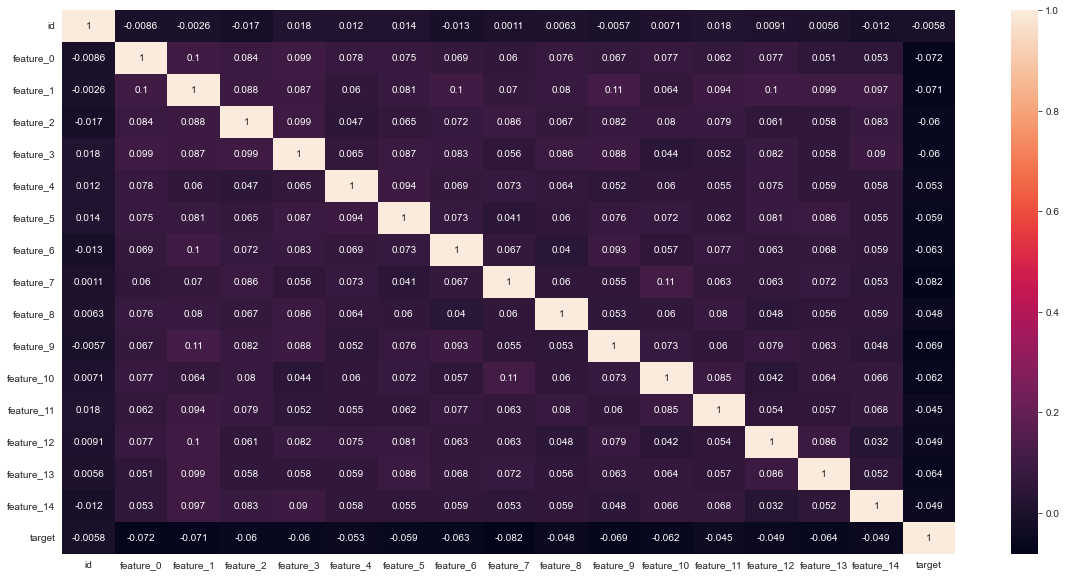

In [183]:
plt.figure(figsize=(20, 10))
sns.heatmap(train.corr(), annot=True)
plt.show()

In [184]:
#Normalising the data between 0 and 1 bcoz data variation is too high
#transforming the required attributes values only
sc = MinMaxScaler()
train[cnt_cols] = sc.fit_transform(train[cnt_cols])
test[cnt_cols] = sc.transform(test[cnt_cols])

In [185]:
train.head(620)

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,target
0,1,0.000000,0.037037,0.000000,0.045455,0.033333,0.000000,0.00,0.000000,0.000000,0.021739,0.015385,0.000000,0.000000,0.011407,0.013699,0
1,2,0.122449,0.000000,0.019231,0.090909,0.033333,0.000000,0.00,0.041667,0.000000,0.000000,0.015385,0.000000,0.000000,0.007605,0.000000,1
2,3,0.061224,0.000000,0.038462,0.000000,0.000000,0.000000,0.00,0.083333,0.000000,0.065217,0.000000,0.000000,0.027778,0.019011,0.013699,1
3,4,0.040816,0.000000,0.067308,0.136364,0.166667,0.000000,0.04,0.041667,0.090909,0.086957,0.123077,0.026316,0.000000,0.030418,0.000000,0
4,5,0.020408,0.000000,0.019231,0.090909,0.100000,0.000000,0.00,0.041667,0.000000,0.065217,0.000000,0.000000,0.027778,0.000000,0.013699,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,616,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.030303,0.043478,0.015385,0.000000,0.027778,0.000000,0.013699,1
616,617,0.000000,0.148148,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.086957,0.000000,0.000000,0.000000,0.015209,0.000000,0
617,618,0.061224,0.259259,0.240385,0.181818,0.033333,0.009804,0.00,0.125000,0.000000,0.086957,0.000000,0.000000,0.027778,0.022814,0.027397,0
618,619,0.081633,0.000000,0.057692,0.000000,0.033333,0.009804,0.00,0.000000,0.000000,0.108696,0.000000,0.026316,0.000000,0.007605,0.013699,0


In [186]:
#creating variable to store id 
id_sample = test['id']
print(id_sample)

0       10001
1       10002
2       10003
3       10004
4       10005
        ...  
4995    14996
4996    14997
4997    14998
4998    14999
4999    15000
Name: id, Length: 5000, dtype: int64


In [187]:
train.head(5)

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,target
0,1,0.000000,0.037037,0.000000,0.045455,0.033333,0.0,0.00,0.000000,0.000000,0.021739,0.015385,0.000000,0.000000,0.011407,0.013699,0
1,2,0.122449,0.000000,0.019231,0.090909,0.033333,0.0,0.00,0.041667,0.000000,0.000000,0.015385,0.000000,0.000000,0.007605,0.000000,1
2,3,0.061224,0.000000,0.038462,0.000000,0.000000,0.0,0.00,0.083333,0.000000,0.065217,0.000000,0.000000,0.027778,0.019011,0.013699,1
3,4,0.040816,0.000000,0.067308,0.136364,0.166667,0.0,0.04,0.041667,0.090909,0.086957,0.123077,0.026316,0.000000,0.030418,0.000000,0
4,5,0.020408,0.000000,0.019231,0.090909,0.100000,0.0,0.00,0.041667,0.000000,0.065217,0.000000,0.000000,0.027778,0.000000,0.013699,0


In [188]:
y = train['target']

x = train.drop(['target'], axis=1)

# Creating a model and splitting it to predict on test dataset

In [189]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x, y ,test_size =0.20,random_state = 101)

In [163]:
#range values for tuning the hyperparameters

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 30,num = 10)]

max_features = ['auto','sqrt']

max_depth = [1,2,3]

min_samples_split = [1,2]

min_samples_leaf = [1,2]


bootstrap = [True,False]

In [164]:
 param_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap':bootstrap}
 print(param_grid)

{'n_estimators': [10, 12, 14, 16, 18, 21, 23, 25, 27, 30], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 2, 3], 'min_samples_split': [1, 2], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


# Predicing the model using random forest

In [190]:

rf_Model = RandomForestClassifier()

In [191]:
#using gridsearchCV to automatically choose hyperparameters for our classifier arguments 
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model ,param_grid = param_grid, cv= 3,verbose=2, n_jobs =5)

In [167]:
rf_Grid.fit(x_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.58787569 0.59075042
 0.590375   0.58787644 0.59674836 0.59412322 0.60249896 0.59637397
 0.58949885 0.59849885        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.58987502 0.59687536 0.59837475 0.59062385 0.59237246 0.59425022
 0.59412505 0.59562327 0.59637486 0.60074903        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.58487541 0.59274924 0.59675024 0.59599939
 0.59512539 0.59862355 0.59774917 0.60187563 0.59762513 0.59112299
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.59637435 0.59274942
 0.6009991  0.58224853 0.59737399 0.59912489 0.5904983

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=5,
             param_grid={'bootstrap': [True, False], 'max_depth': [1, 2, 3],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2],
                         'n_estimators': [10, 12, 14, 16, 18, 21, 23, 25, 27,
                                          30]},
             verbose=2)

In [173]:
#selecting the best combination of hyperparameters for better accuracy
rf_Grid.best_params_   

{'bootstrap': True,
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 18}

In [174]:
print(f'Train Accuracy -  : {rf_Grid.score(x_train, y_train):3f}')
print(f'Test Accuracy -  : {rf_Grid.score(x_test, y_test):3f}')

Train Accuracy -  : 0.617375


ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [195]:
scores = []
folds = 5
train["kfold"] = -1
kf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=0)

for fold, (train_indicies, valid_indicies) in enumerate(kf.split(train,train["target"])):
    train.loc[valid_indicies, "kfold"] = fold

In [196]:
from sklearn.ensemble import RandomForestClassifier

In [197]:
train['preds'] = 0
test['preds'] = 0

In [198]:
from sklearn.datasets import make_classification

In [199]:
test.head(5)

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,preds
0,10001,0.081633,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.304348,0.000000,0.000000,0.000000,0.030418,0.000000,0
1,10002,0.040816,0.000000,0.269231,0.000000,0.033333,0.000000,0.00,0.041667,0.000000,0.000000,0.061538,0.000000,0.000000,0.015209,0.000000,0
2,10003,0.102041,0.148148,0.000000,0.045455,0.033333,0.000000,0.00,0.083333,0.000000,0.021739,0.000000,0.000000,0.027778,0.000000,0.000000,0
3,10004,0.020408,0.037037,0.125000,0.000000,0.000000,0.137255,0.00,0.000000,0.030303,0.043478,0.000000,0.000000,0.055556,0.049430,0.027397,0
4,10005,0.000000,0.037037,0.259615,0.045455,0.300000,0.009804,0.04,0.083333,0.030303,0.043478,0.000000,0.342105,0.000000,0.022814,0.013699,0


In [201]:
%%time

for fold in range(5):
    x_train = train[train.kfold != fold].copy()
    x_valid = train[train.kfold == fold].copy()
    x_test  = test[feature_cols].copy()
    y_test  = test[feature_cols].copy()
    y_train = x_train['target']
    y_valid = x_valid['target']
    
    x_train = x_train[feature_cols]
    x_valid = x_valid[feature_cols]
    

 
    
    lr_model = RandomForestClassifier(n_estimators =2000, criterion = 'entropy', random_state =0,max_depth=200,min_samples_split =11,min_samples_leaf=11,max_leaf_nodes=500,n_jobs=1,bootstrap='True',max_features = 'auto')  
    lr_model.fit(x_train,y_train)
    preds_train = lr_model.predict_proba(x_train)[:,1]
    preds_valid = lr_model.predict_proba(x_valid)[:,1]
    auc_train = roc_auc_score(y_train, preds_train)
    auc = roc_auc_score(y_valid, preds_valid)
    print(f"| Fold {fold+1} | train: {auc_train:.5f} | valid: {auc:.5f} |")
    print("|--------|----------------|----------------|")
    scores.append(auc)
    
    preds_test = lr_model.predict_proba(x_test)[:,1]
    train["preds"].loc[x_valid.index] = preds_valid
    test["preds"] += preds_test
    
test["preds"] /= folds
print("\nAVG AUC:",np.mean(scores))

| Fold 1 | train: 0.87815 | valid: 0.65263 |
|--------|----------------|----------------|


C:\Users\ACER\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


| Fold 2 | train: 0.87595 | valid: 0.63525 |
|--------|----------------|----------------|


C:\Users\ACER\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


| Fold 3 | train: 0.87532 | valid: 0.63930 |
|--------|----------------|----------------|


C:\Users\ACER\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


| Fold 4 | train: 0.87528 | valid: 0.64506 |
|--------|----------------|----------------|


C:\Users\ACER\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


| Fold 5 | train: 0.87359 | valid: 0.65159 |
|--------|----------------|----------------|

AVG AUC: 0.6447671852028865
Wall time: 1min 49s


C:\Users\ACER\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [202]:
sample_submission['target'] = test['preds']
sample_submission.to_csv("finalhbmission.csv", index=False)
sample_submission.head()

,id,target
0,10001,0.689071
1,10002,0.573261
2,10003,0.546949
3,10004,0.536015
4,10005,0.499998
